# FAO FLW Dataset Exploration

## Downloading FLW Dataset
Download data from FAO. (**Note: The following steps are valid as of March 2022**)
* Go to FAO's FLW data page. [link](https://www.fao.org/platform-food-loss-waste/flw-data/en/).
* Select "Year Range." For this script, I used 1965 - 2021.
* Download data by clicking the "Download Data" button on the bottom left of the page. 
* Move the data to `./data` directory.

<img src="./data/flw-data-download.png" alt="flw-data-download" width="200"/>

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read and show the first four rows of the dataframe
df = pd.read_csv('./data/Data.csv')
df[:4]

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


In [3]:
# Let's rename somuniqueommodities since they are too long. I have zero idea of what they really mean but whatever.
print("Commodities with long names:")
sorted(df['commodity'].unique(), key=lambda x: len(x), reverse=True)[:15]

Commodities with long names:


['Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails',
 'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw',
 'Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)',
 'Edible roots and tubers with high starch or inulin content, n.e.c., fresh',
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
 'Edible roots and tubers with high starch or inulin content, n.e., fresh',
 'Edible roots and tubers with high starch or inulin content, n.e.c., dry',
 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
 'Pig meat, cuts, salted, dried or smoked (bacon and ham)',
 'Other berries and fruits of the genus Vaccinium n.e.',
 'Cranberries and other fruits of the genus Vaccinium',
 'Uncooked pasta, not stuffed or otherwise prepared',
 'Other stimulant, spice and aromatic crops, n.e.c.',
 'Edible offal of cattle, fresh, chilled or frozen',
 'Onions and shallots, dry (excluding dehydrated)']

In [4]:
# define mapping
commodity_name_mapping = {
    'Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails': 'Snails (except sea snails)',
    'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw': "Chillies, dry, raw",
    'Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)': "Chillies, green",
    'Edible roots and tubers with high starch or inulin content, n.e.c., fresh': "Edible roots and tubers, n.e.c., fresh",
    'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw': "Spices (anise, badian, ...), raw",
    'Edible roots and tubers with high starch or inulin content, n.e., fresh': "Edible roots and tubers, n.e., fresh", 
    'Edible roots and tubers with high starch or inulin content, n.e.c., dry': "Edible roots and tubers, n.e.c., dry",
    'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)': "Chillies, green",
    'Pig meat, cuts, salted, dried or smoked (bacon and ham)': "Cured pork",
    'Uncooked pasta, not stuffed or otherwise prepared': "Uncooked pasta",
    'Edible offal of cattle, fresh, chilled or frozen': "Edible offal of cattle",
    'Onions and shallots, dry (excluding dehydrated)': "Dry onions and shallots"
}
# apply mapping
df['commodity'] = df['commodity'].apply(lambda x: commodity_name_mapping.get(x, x))

## Which commodity has the most loss_percentage?
Let's first look at the loss percentage in the U.S., 2019. 

The following block is to show the loss percentage per commodity. 

It's interesting that grapefruit juice has high loss percentage while grapfruits have low loss percentage. 

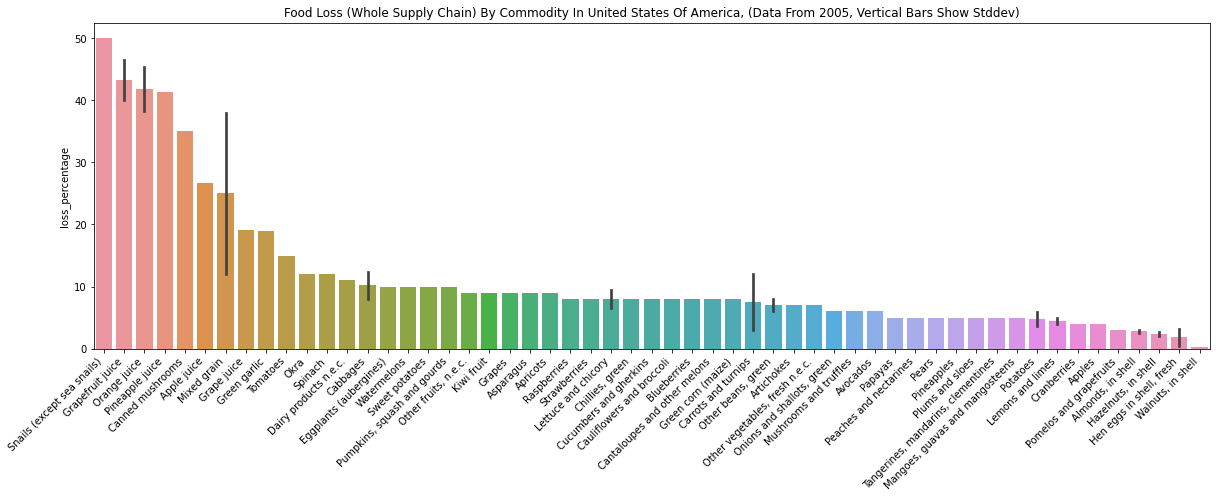

In [5]:
country = 'United States of America'
year = 2005
supply_stage = "Whole supply chain"
df_filtered = df[(df['country']==country) & (df['food_supply_stage'] == supply_stage) & (df['year'] > year)]

plot_order = df_filtered.groupby(by='commodity').mean().sort_values(by='loss_percentage', ascending=False).index.tolist()
fig, ax = plt.subplots(figsize=(20, 6))
plot = sns.barplot(x='commodity', y='loss_percentage', data=df_filtered, order=plot_order, ci='sd')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set_title(f"Food Loss ({supply_stage}) by Commodity in {country}, (data from {year}, vertical bars show stddev)".title())
ax.set(xlabel=None)
plt.show()

Let's take a look at different countries.

Copy-pasting code is not a good practice, but since I'm using jupyter-notebook, I'll just do it.

It's hard to find patterns just by looking at the results. 

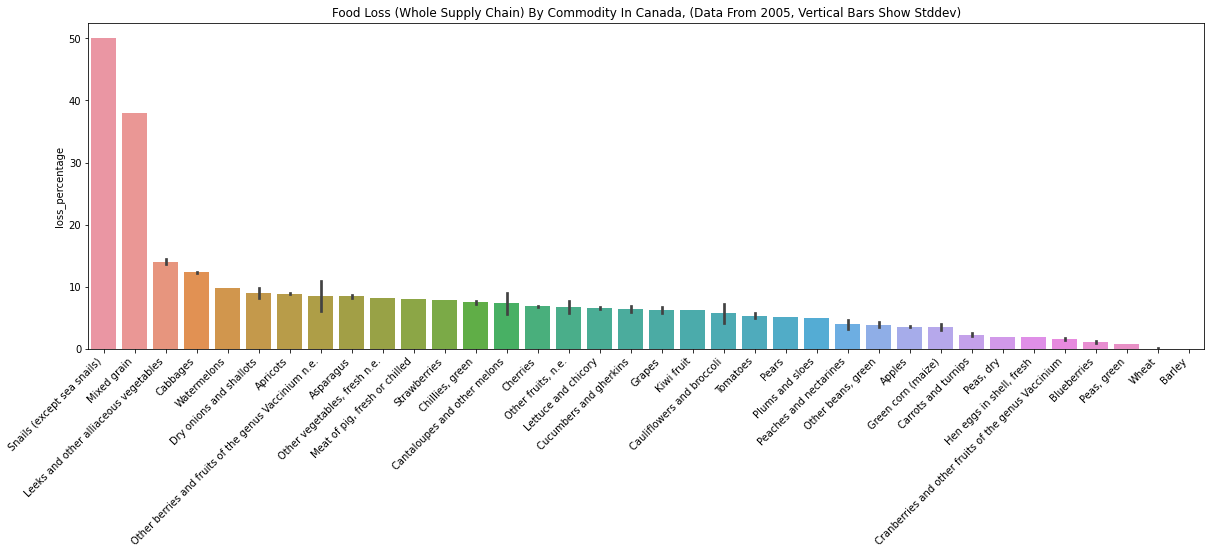

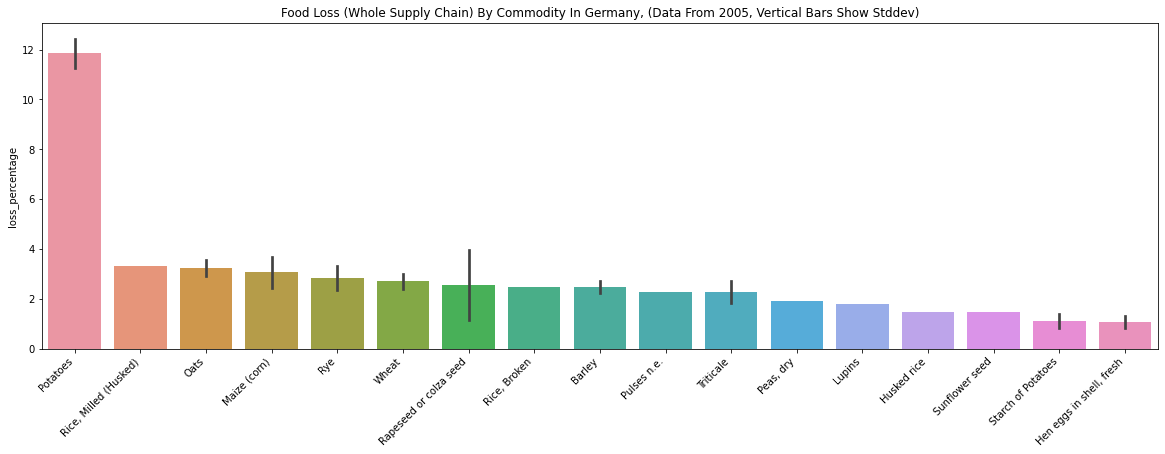

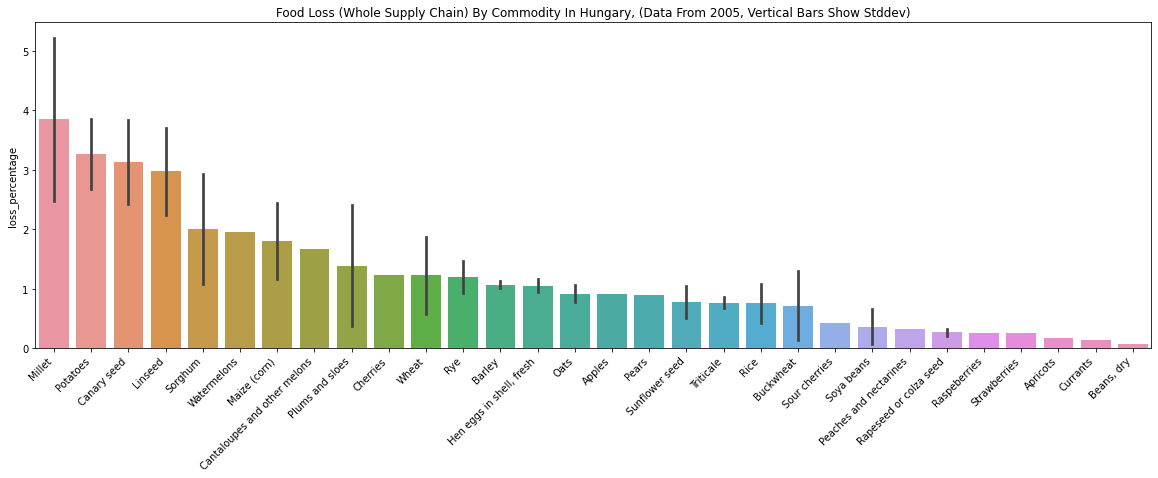

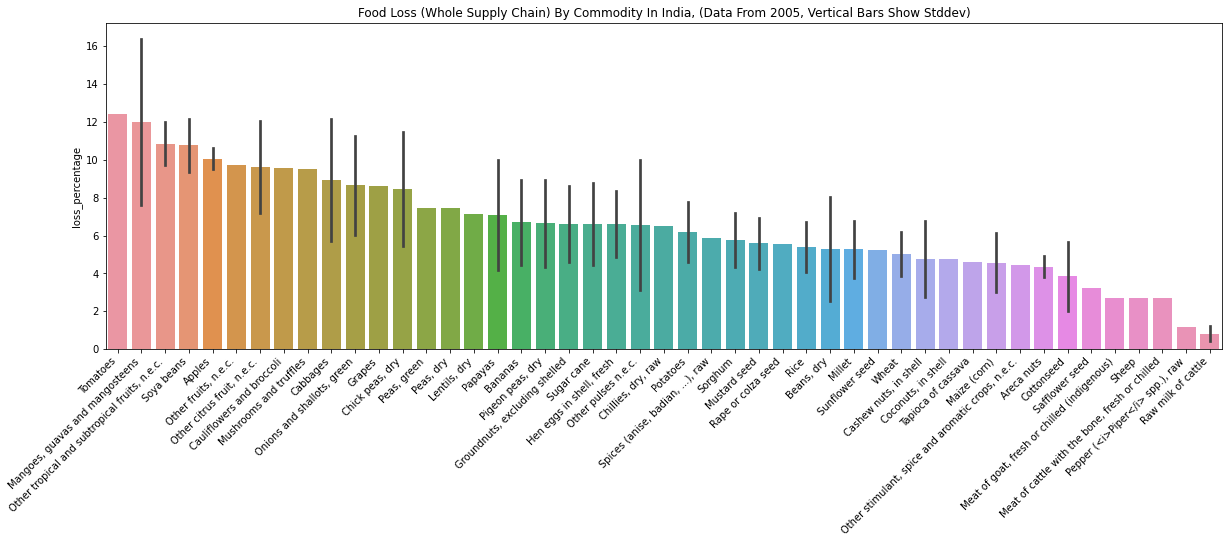

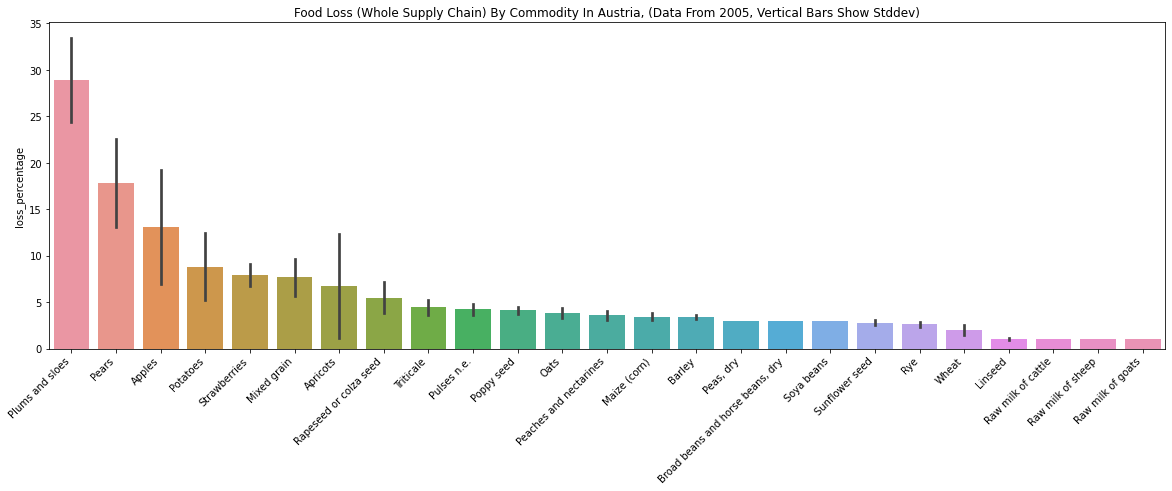

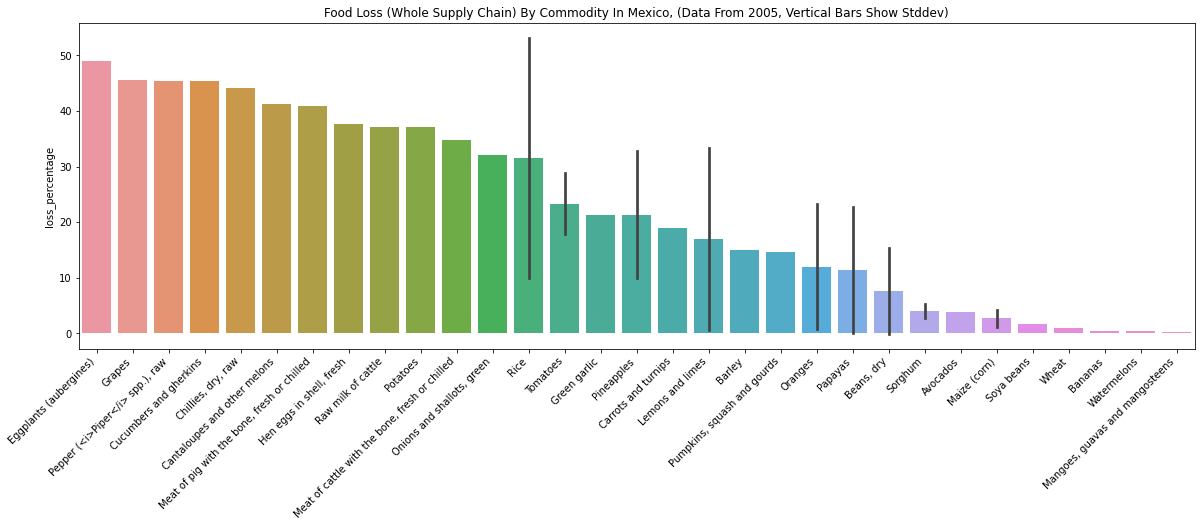

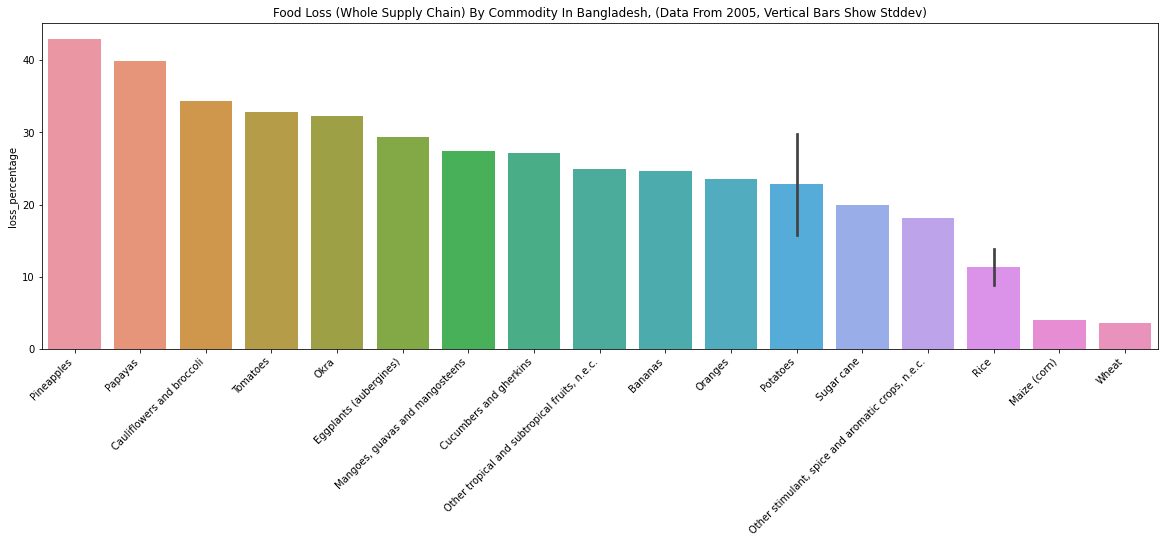

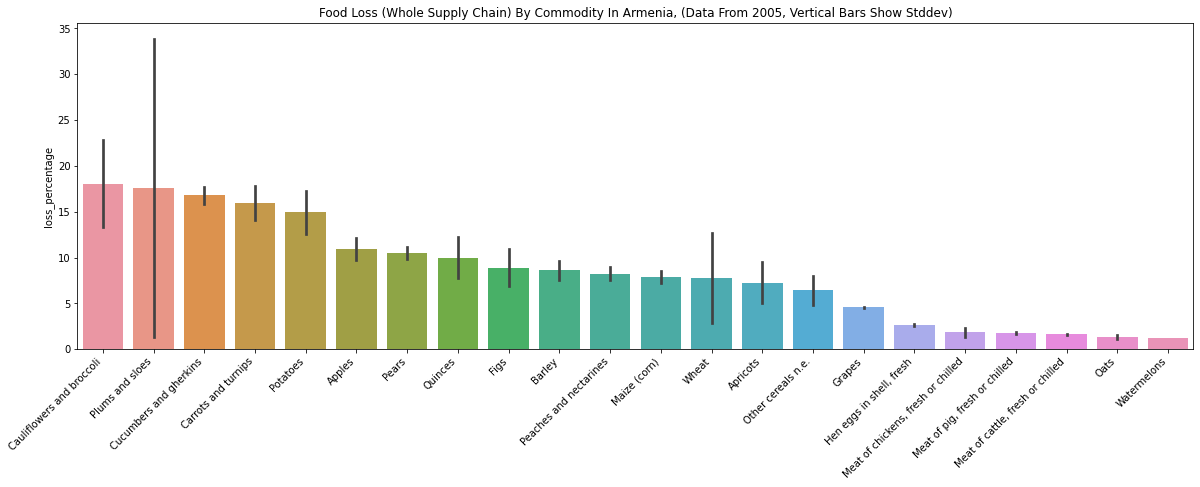

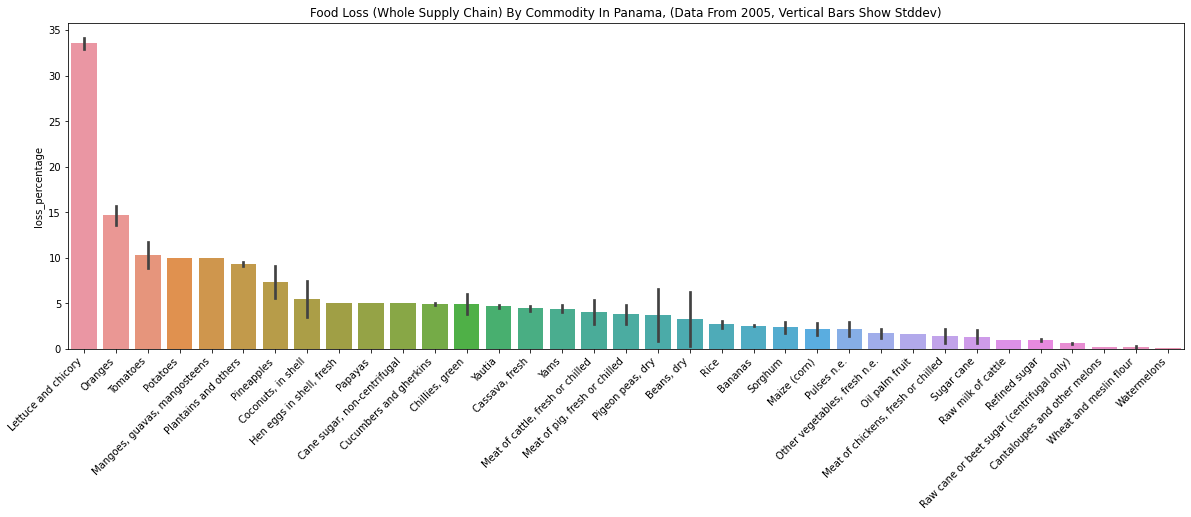

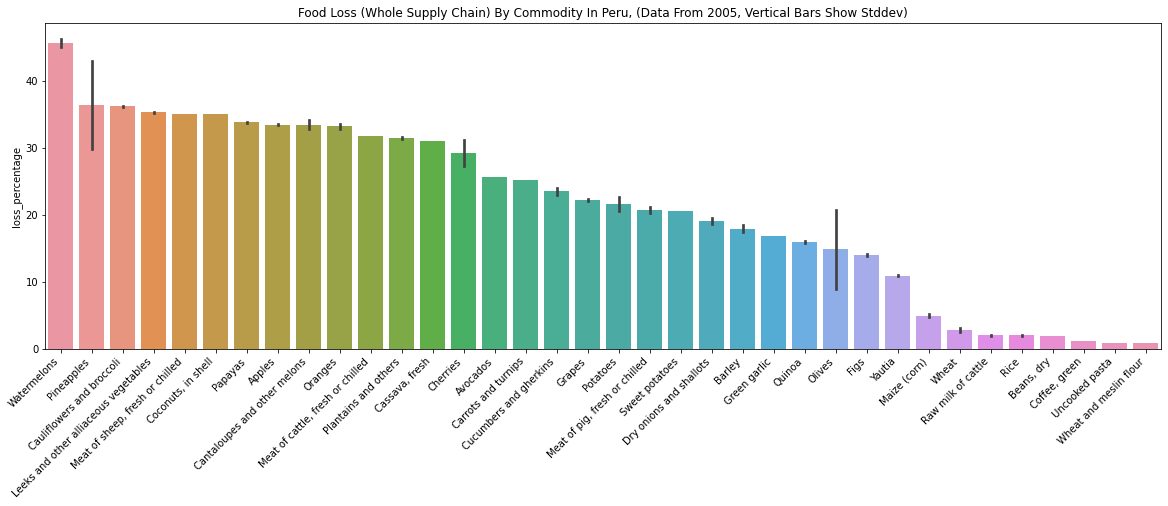

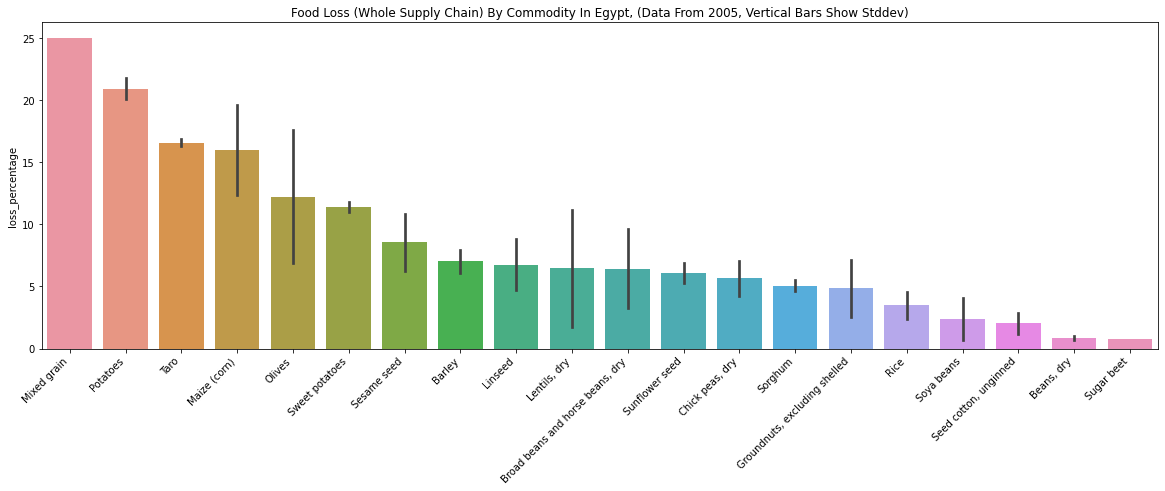

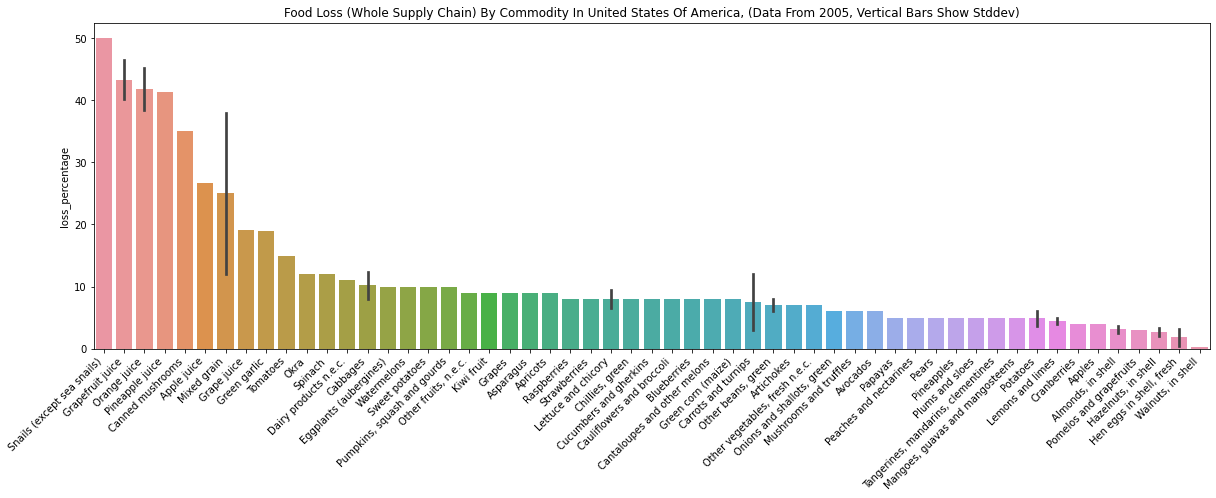

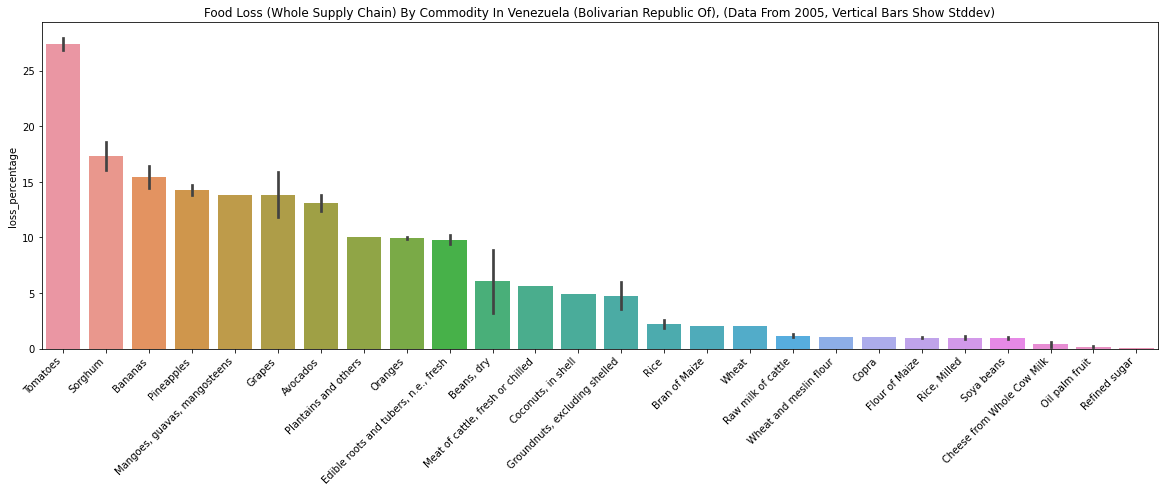

In [6]:
year = 2005
for country in df['country'].unique():
    supply_stage = "Whole supply chain"
    df_filtered = df[(df['country']==country) & (df['food_supply_stage'] == supply_stage) & (df['year'] >= year)]
    # skip small data
    if len(df_filtered['commodity'].unique()) < 15:
        continue      
    plot_order = df_filtered.groupby(by='commodity').mean().sort_values(by='loss_percentage', ascending=False).index.tolist()
    fig, ax = plt.subplots(figsize=(20, 6))
    plot = sns.barplot(x='commodity', y='loss_percentage', data=df_filtered, order=plot_order, ci='sd')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    ax.set_title(f"Food Loss ({supply_stage}) by Commodity in {country}, (data from {year}, vertical bars show stddev)".title())    
    ax.set(xlabel=None)
    plt.show()

I'll group the data by commodity and plot the distribution of loss percentages across different countries. 

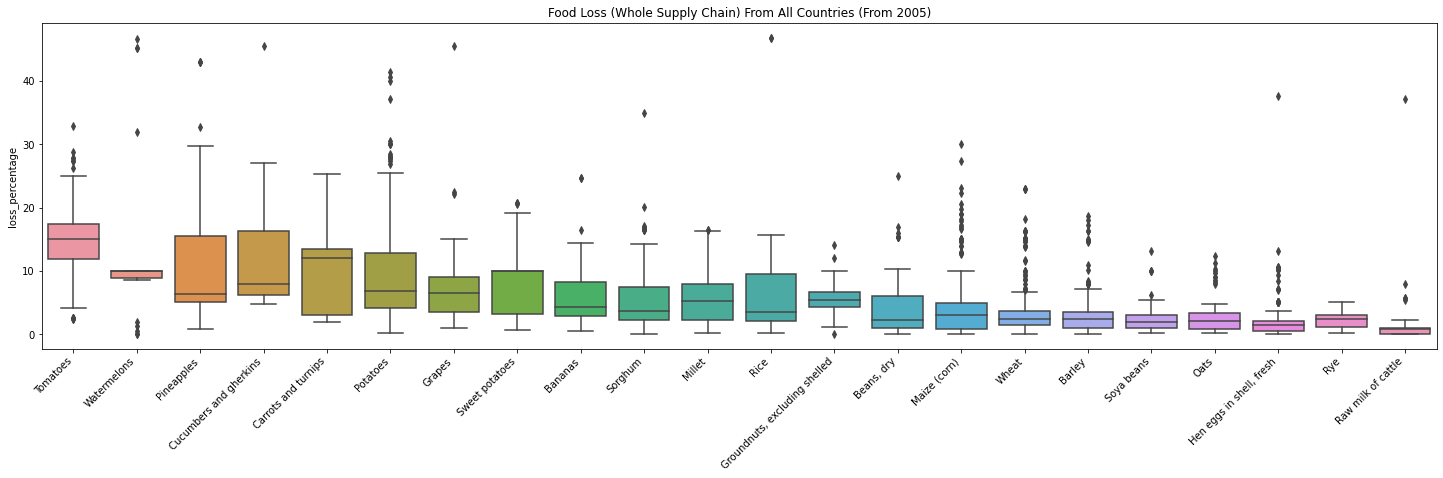

In [7]:
supply_stage = "Whole supply chain"
year = 2005
df_filtered = df[(df['food_supply_stage'] == supply_stage) & (df['year'] >= year)]  # use recent data
# Get commodities with data points from many countries.
n_country_threshold = 9  # We only use commidity where data is collected from more than n_country_threshold countries. 
unique_country_commodity_pairs = set(zip(df_filtered['country'], df_filtered['commodity'])) # unique (country, commodity) pairs
commodity_counter = Counter([commodity_ for _, commodity_ in unique_country_commodity_pairs]) 
common_commidties = set({x: count for x, count in commodity_counter.items() if count >= n_country_threshold}.keys())
df_filtered = df_filtered[df_filtered['commodity'].isin(common_commidties)]
commidty_plot_order = df_filtered.groupby(by='commodity').mean().sort_values(by='loss_percentage', ascending=False).index.tolist()
fig, ax = plt.subplots(figsize=(25, 6))
plot = sns.boxplot(x='commodity', y='loss_percentage', data=df_filtered, order=commidty_plot_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set_title(f"Food Loss ({supply_stage}) from all countries (from {year})".title() )
ax.set(xlabel=None)
plt.show()

Just by looking at the plot, seems like fruits (e.g. tomatoes, watermelons, ..) produce more waste than grains (e.g. oats, rhye, ...)

Now let's see which stage of food supply chain has the most food loss. I'll focus on the U.S. data only. 

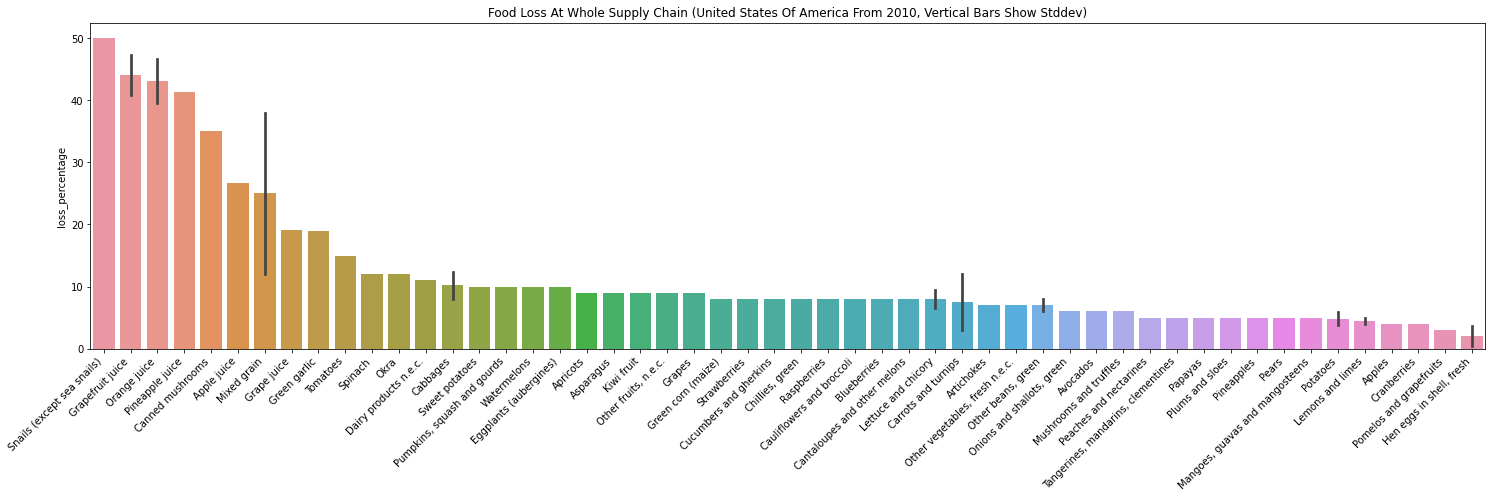

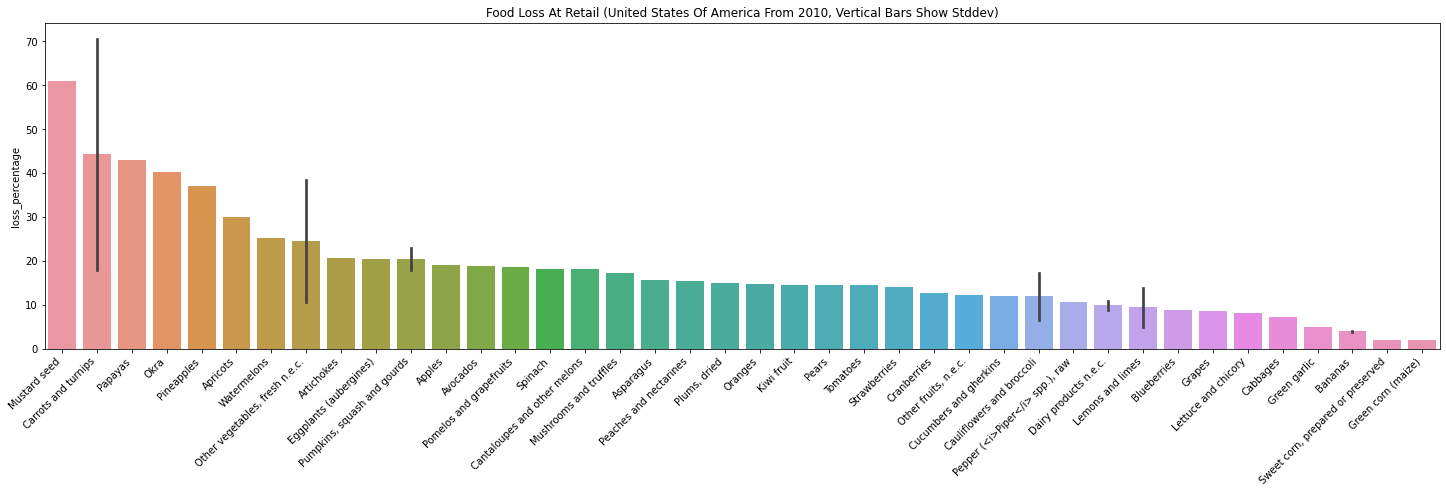

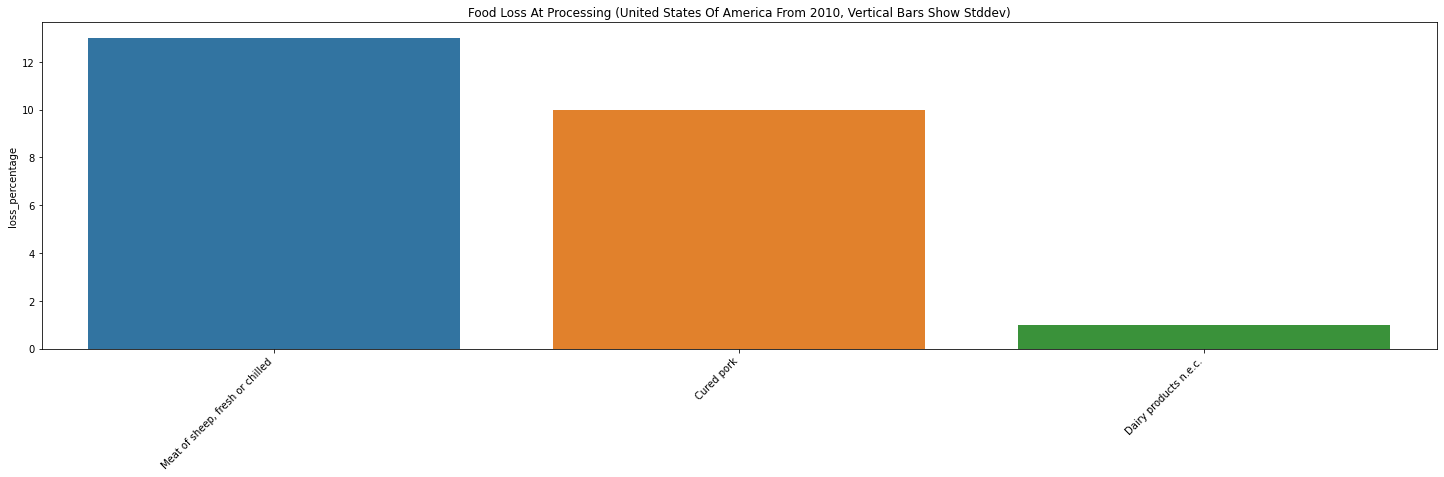

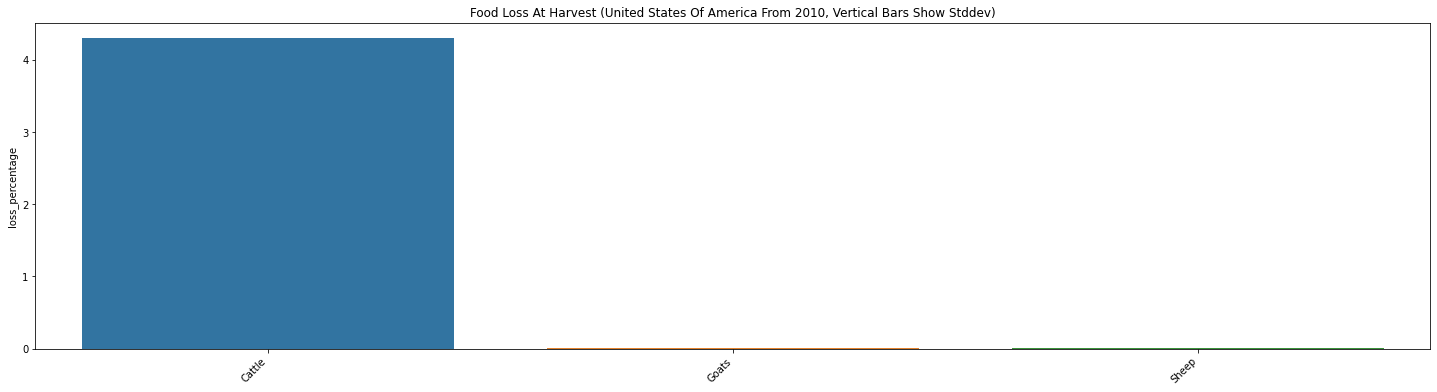

In [8]:
country = 'United States of America'
year = 2010
df_filtered_by_country = df[(df['country']==country) & (df['year'] >= year)]
for supply_stage in df_filtered_by_country['food_supply_stage'].unique():
    df_filtered = df_filtered_by_country[df_filtered_by_country['food_supply_stage'] == supply_stage]  # use recent data
    if len(df_filtered) < 3:
        continue
    commidty_plot_order = df_filtered.groupby(by='commodity').mean().sort_values(by='loss_percentage', ascending=False).index.tolist()
    fig, ax = plt.subplots(figsize=(25, 6))
    plot = sns.barplot(x='commodity', y='loss_percentage', data=df_filtered, order=commidty_plot_order, ci='sd')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    ax.set_title(f"Food Loss at {supply_stage} ({country} from {year}, Vertical bars show stddev)".title() )
    ax.set(xlabel=None)
    plt.show()

Data doesn't seem very clean. Why there are only three commodities for "Processing" and "Harverst" stage? 

## Which Countries Produce More Food Waste?

In [9]:
supply_stage = "Whole supply chain"
year = 2005
df_filtered = df[(df['food_supply_stage'] == supply_stage) & (df['year'] >= year)]  # use recent data
unique_country_commodity_pairs = set(zip(df_filtered['country'], df_filtered['commodity'])) # unique (country, commodity) pairs
common_commidties = [commodity for commodity, _ in Counter([commodity for _, commodity in unique_country_commodity_pairs]).most_common(10)]

It's very interesting to see food loss percentages are very different between the countries even for the same commodities. 

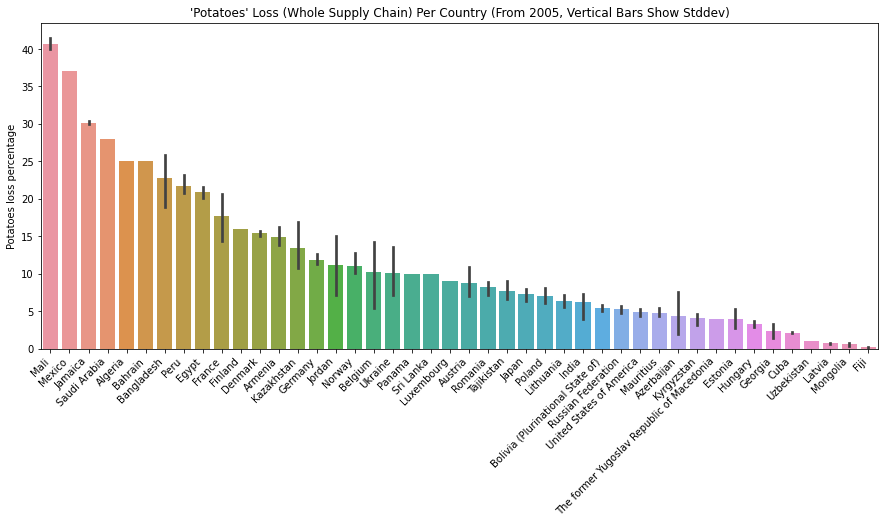

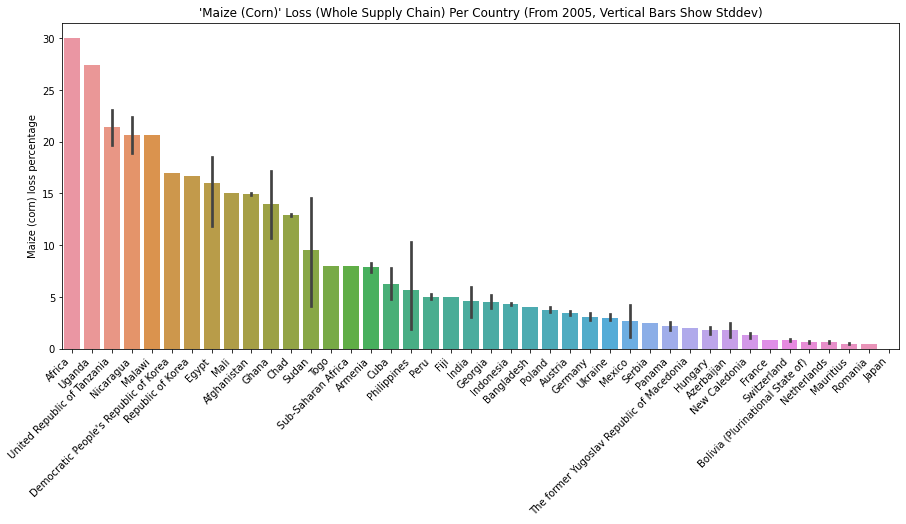

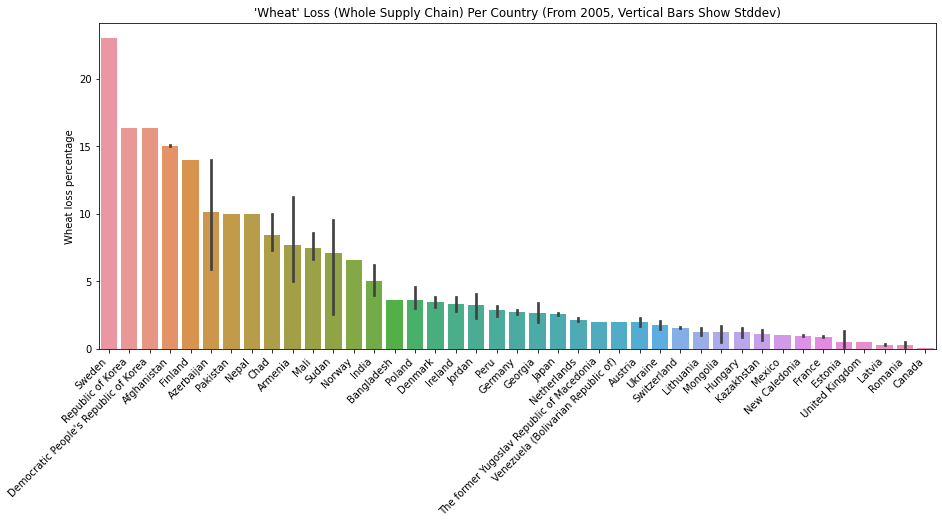

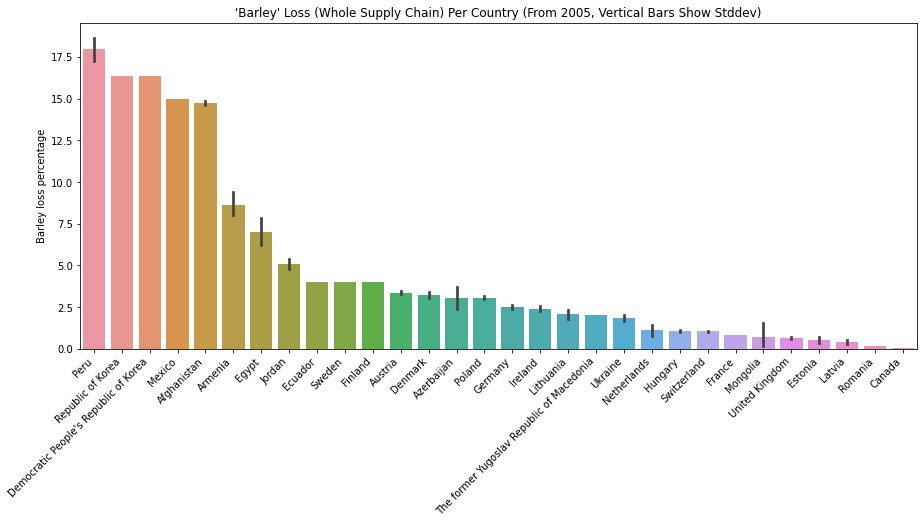

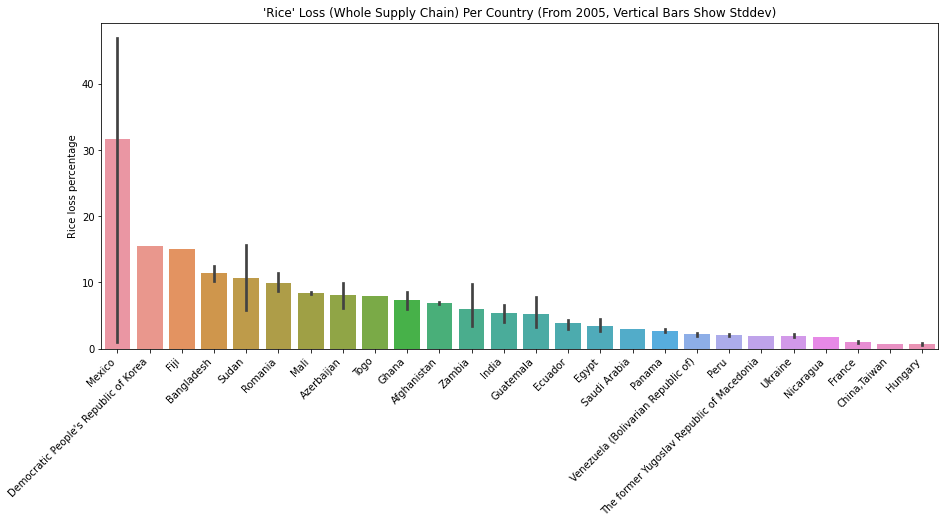

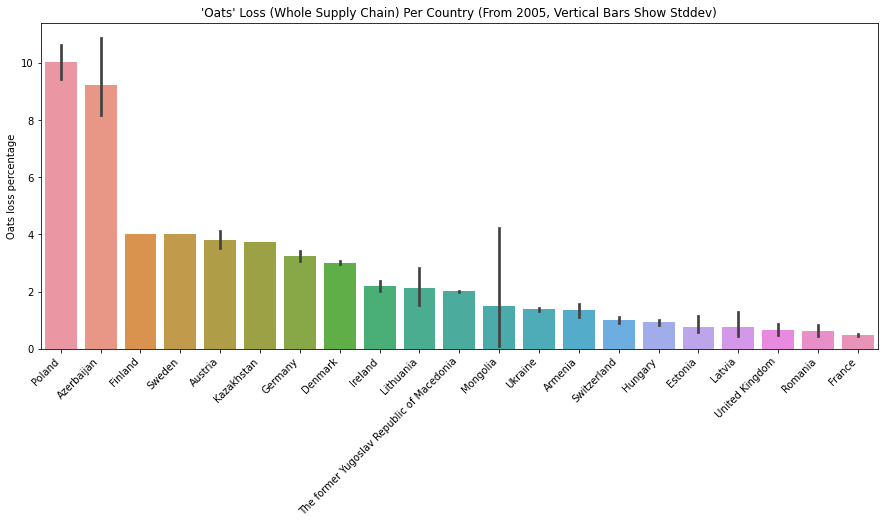

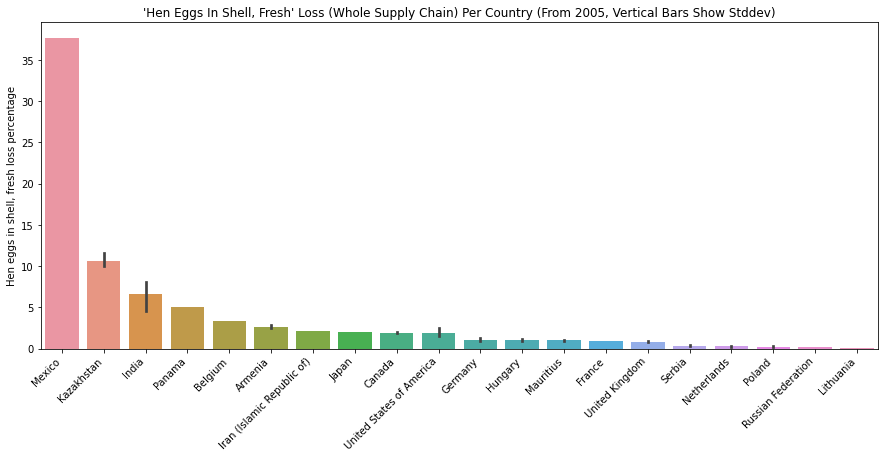

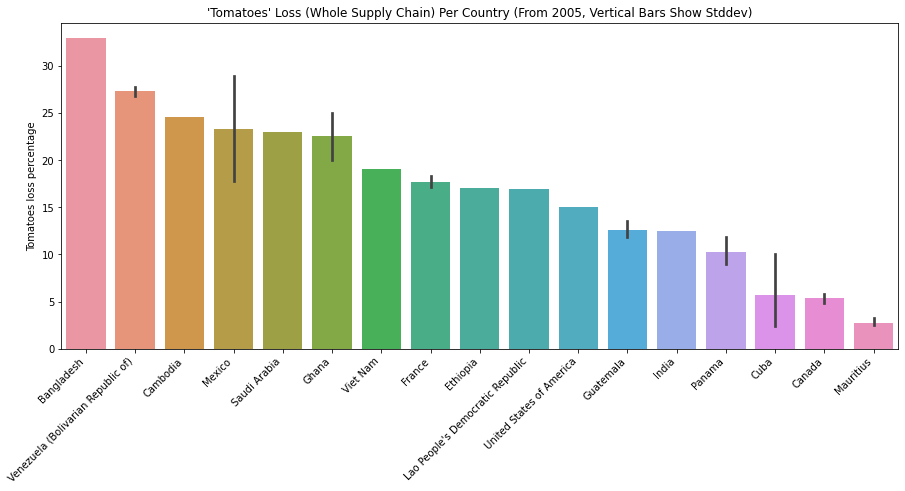

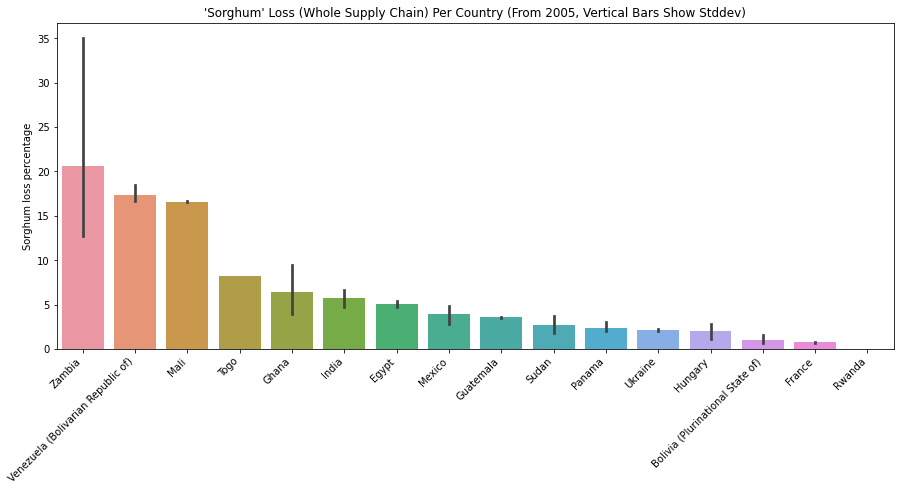

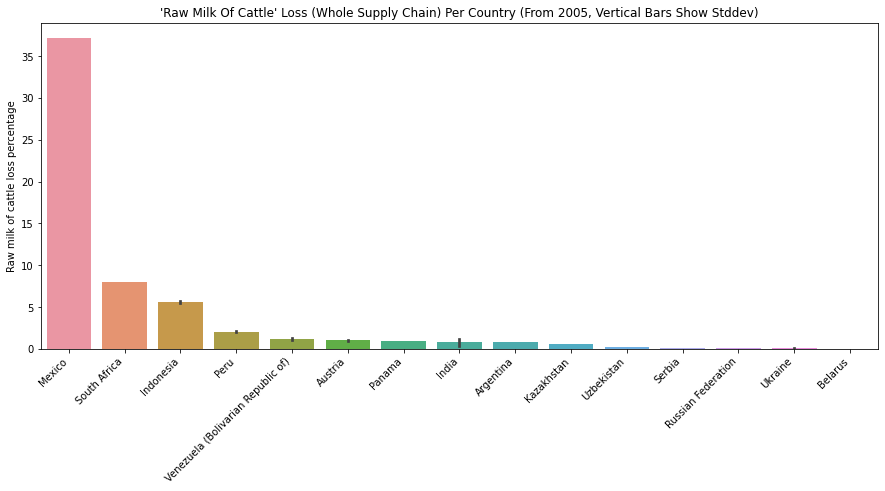

In [10]:
for commodity in common_commidties:
    df_filtered_by_commodity = df_filtered[df_filtered['commodity'] == commodity]
    fig, ax = plt.subplots(figsize=(15, 6))
    plot_order = df_filtered_by_commodity.groupby(by='country').mean().sort_values(by='loss_percentage', ascending=False).index.tolist()
    sns.barplot(x='country', y='loss_percentage', data=df_filtered_by_commodity, ax=ax, order=plot_order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    ax.set_title(f"'{commodity}' Loss ({supply_stage}) per Country (from {year}, Vertical bars show stddev)".title() )
    ax.set(xlabel=None)
    ax.set_ylabel(f"{commodity} loss percentage")
    plt.show()